In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [92]:
df = pd.read_csv('insurance.csv')

In [93]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [95]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


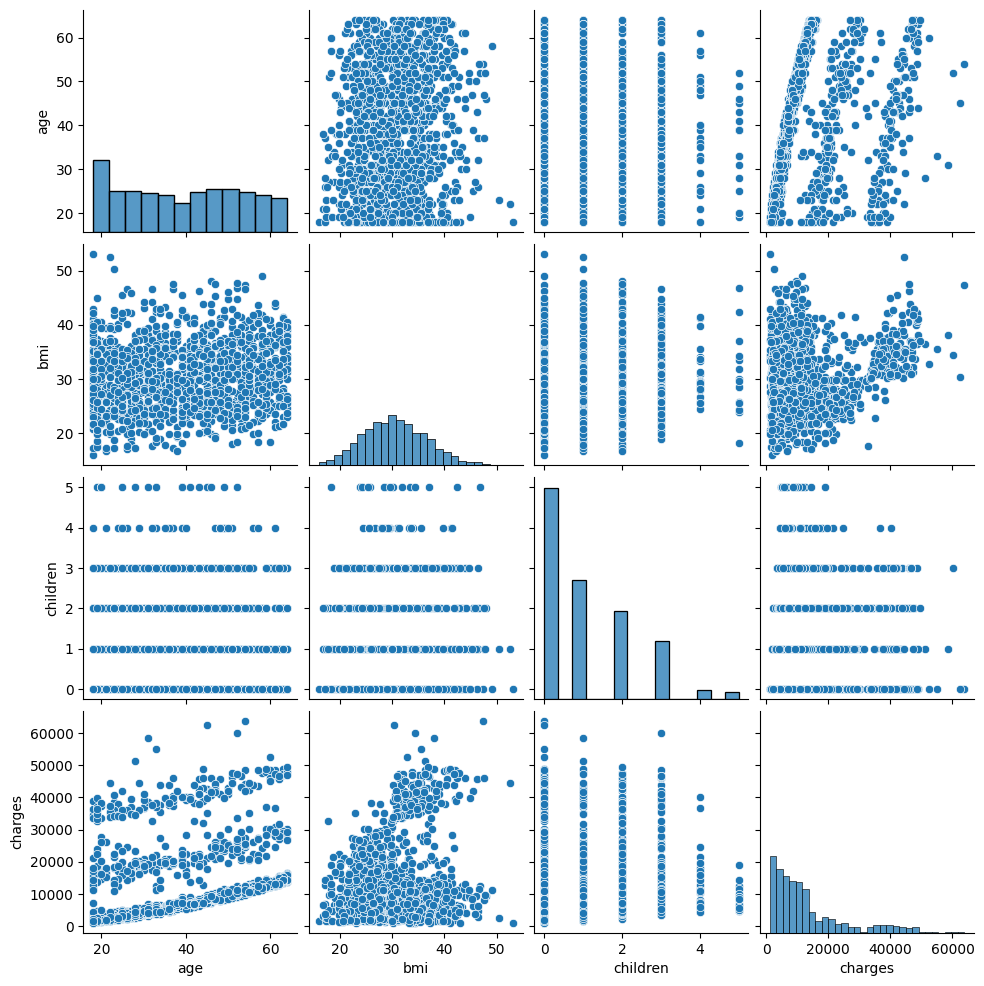

In [96]:
sns.pairplot(df)

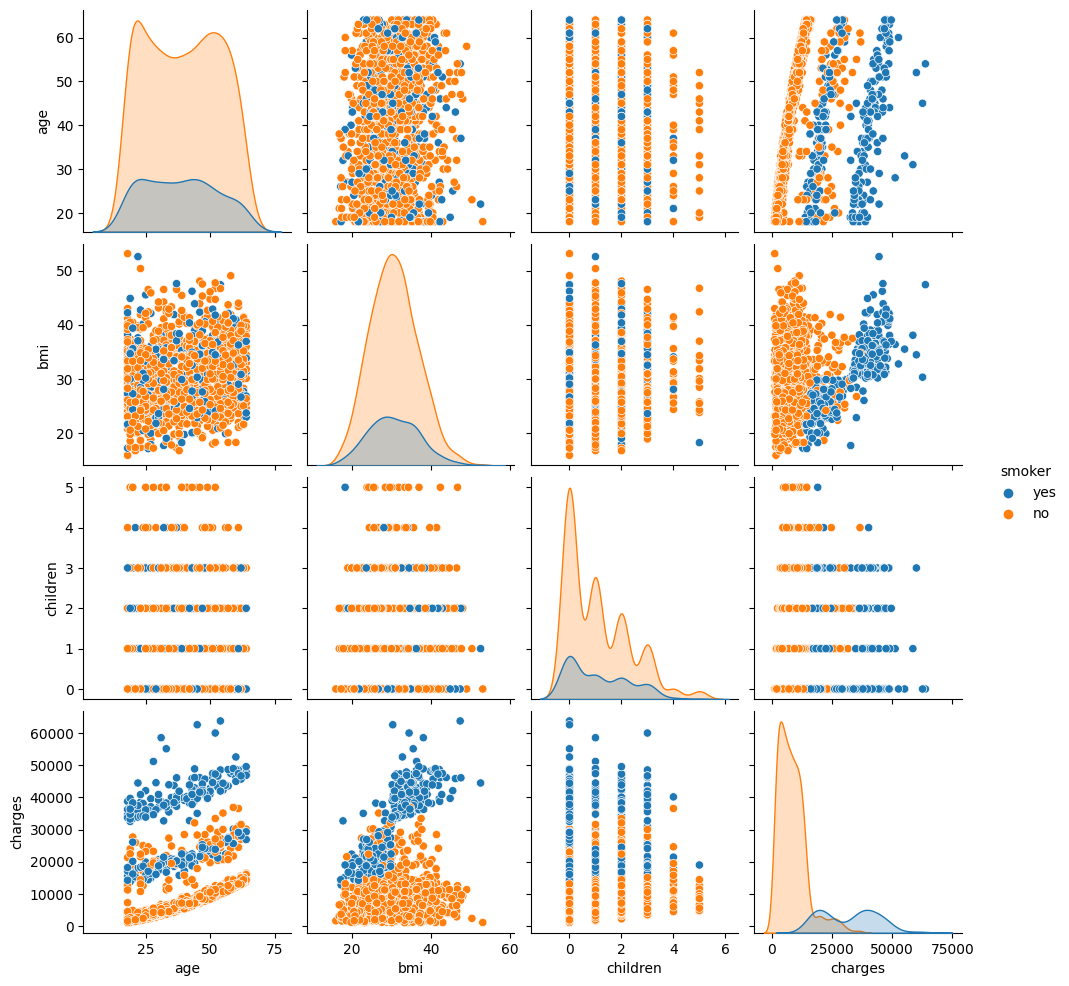

In [97]:
sns.pairplot(df, hue = 'smoker')

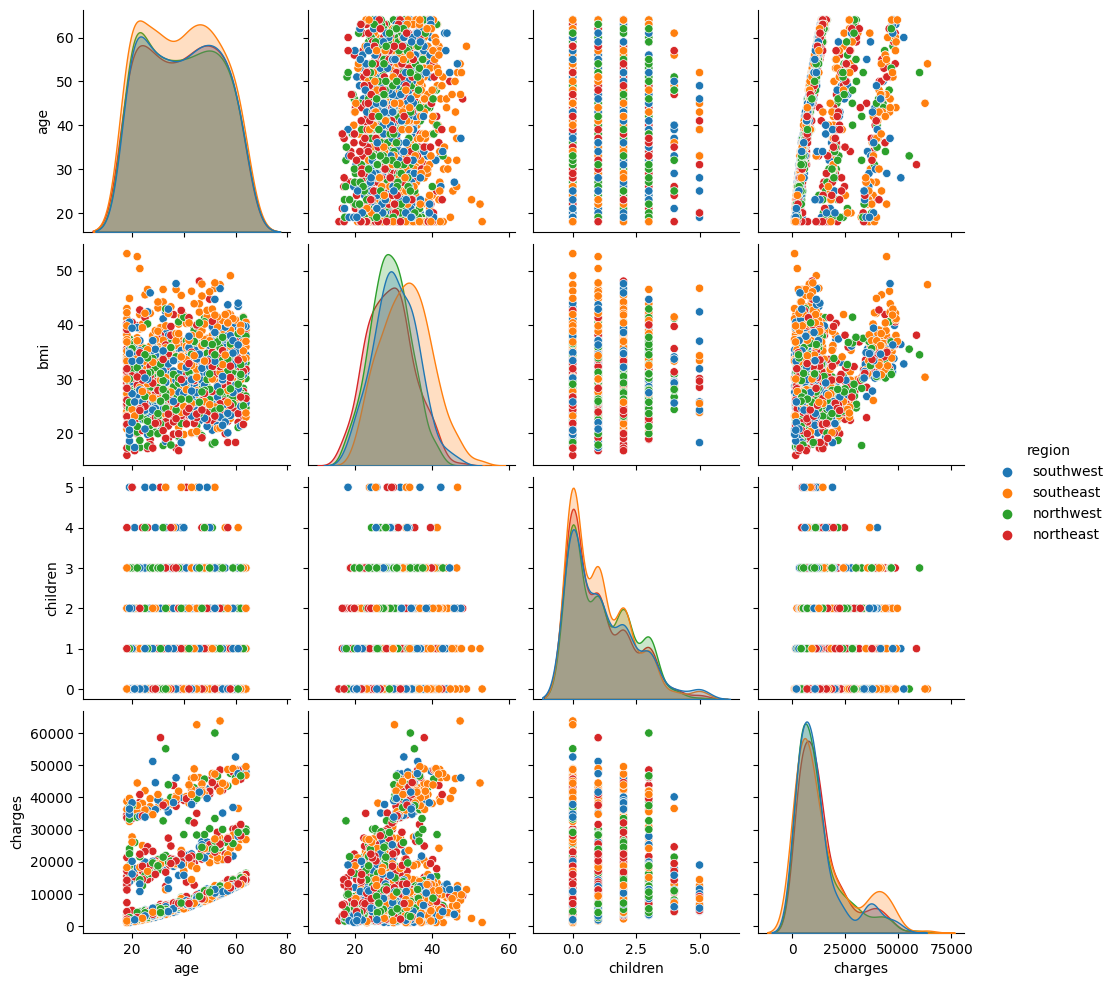

In [98]:
sns.pairplot(df, hue = 'region')

In [111]:
df_encoded = df.copy()

In [112]:
df_encoded['smoker'] = df_encoded['smoker'].map({'yes':1, 'no':0})

In [113]:
X = df_encoded.iloc[:, df_encoded.columns != 'charges']
y = df_encoded.iloc[:, df_encoded.columns == 'charges']

In [114]:
print(X.shape)
print(y.shape)

(1338, 6)
(1338, 1)


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_features = num_variables = X.select_dtypes(include=[np.number]).columns
categorical_features = num_variables = X.select_dtypes(include=[object]).columns

preprocessor = ColumnTransformer(
    transformers = [
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

model = Pipeline ([
    ('proprocessor', preprocessor),
    ('linearreg', LinearRegression())
])

model.fit(X_train, y_train)


Pipeline(steps=[('proprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['age', 'bmi', 'children', 'smoker'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['sex', 'region'], dtype='object'))])),
                ('linearreg', LinearRegression())])

In [133]:
y_pred = model.predict(X_train)

In [136]:
from sklearn import metrics

r2_train = metrics.r2_score(y_train, y_pred)
print(r2_train)

0.741917103393209


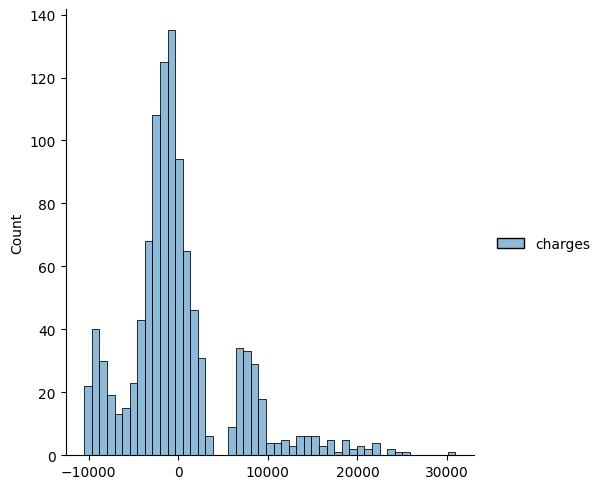

In [138]:
sns.displot(y_train - y_pred)

In [137]:
y_test_pred = model.predict(X_test)

r2_test = metrics.r2_score(y_test, y_test_pred)
print(r2_test)

0.777711331718795
